In [20]:
# code for making a box and whisker plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv('/home/dices/Research/GWlensing_Brian/src_pos_for_dist_with_z_de+mcmc.csv')

dz=abs(data['z']-data['localized_z'])
#print(dz)
# add the dz column to the dataframe
data['dz'] = dz.round(12)
# calculate dA by dxdy
dx = abs(data['x'] - data['localized_x'])
dy = abs(data['y'] - data['localized_y'])
data['dx'] = dx.round(12)
data['dy'] = dy.round(12)
data['dS'] = np.sqrt(dx**2 + dy**2).round(12)
# Print the dataframe with 12 decimal places
print(data)
# save the dataframe in original file
#data.to_csv('/home/dices/Research/GWlensing_Brian/src_pos_for_dist_with_z_de+mcmc.csv', index=False)

   indices        x       y      z  localized_index  localized_x  localized_y  \
0   0.0000  87.3000 73.4000 2.9200           0.0000      87.3012      73.3936   
1   1.0000  67.5000 81.0000 3.0000           1.0000      67.4834      80.9732   
2   2.0000 110.9000 88.7000 3.1000           2.0000     110.2000      90.0600   
3   4.0000  80.1000 99.9000 3.3000           4.0000      79.0200      98.9400   
4   3.0000  72.4000 57.2000 2.9000           5.0000      77.3300      70.2400   
5   3.0000  71.3000 56.9000 3.4400           3.0000      71.2400      56.6800   

   localized_z  localized_chi_sq     dz     dx      dy      dS  
0       2.9126            0.0031 0.0074 0.0012  0.0064  0.0065  
1       2.9797            0.0001 0.0203 0.0166  0.0268  0.0315  
2       3.1800            0.0115 0.0800 0.7000  1.3600  1.5296  
3       3.2300            0.2081 0.0700 1.0800  0.9600  1.4450  
4       1.9500            0.0003 0.9500 4.9300 13.0400 13.9408  
5       3.4800            0.0028 0.0400 0.

In [22]:
data_zH0 = pd.read_csv('/home/dices/Research/GWlensing_Brian/src_pos_for_dist_with_z_H0_de+mcmc.csv')

dz=abs(data_zH0['z']-data_zH0['localized_z'])
dH0=abs(data_zH0['H0']-data_zH0['localized_H0'])
#print(dz)
# add the dz column to the dataframe
data_zH0['dz'] = dz.round(12)
data_zH0['dH0'] = dH0.round(12)
# calculate dA by dxdy
dx = abs(data_zH0['x'] - data_zH0['localized_x'])
dy = abs(data_zH0['y'] - data_zH0['localized_y'])

data_zH0['dx'] = dx.round(12)
data_zH0['dy'] = dy.round(12)
data_zH0['dS'] = np.sqrt(dx**2 + dy**2).round(12)
# Print the dataframe with 10 decimal places
columns_to_format = ['dz', 'dx', 'dy', 'dS']
print(data_zH0)
# save the dataframe in original file
# data.to_csv('/home/dices/Research/GWlensing_Brian/src_pos_for_dist_with_z_H0_de+mcmc.csv', index=False)

    indices        x       y      z      H0  localized_index  localized_x  \
0    1.0000  67.5000 81.0000 3.0000 70.0000           1.0000      67.3256   
1    2.0000 110.9000 88.7000 3.1000 70.0000           2.0000     109.1233   
2    4.0000  80.1000 99.9000 3.3000 65.0000           4.0000      80.1783   
3    3.0000  72.4000 57.2000 2.9000 73.0000           3.0000      72.3722   
4    3.0000  71.3000 56.9000 3.4400 79.5000           3.0000      71.3955   
5    5.0000  75.4000 69.2000 3.4000 66.0000           5.0000      75.4174   
6    1.0000  70.0000 75.0000 3.1200 74.1000           1.0000      70.0079   
7    4.0000  80.0200 99.7000 3.1200 80.3000           4.0000      79.9952   
8    2.0000 107.0000 89.0000 2.6500 66.0000           2.0000     107.0101   
9    0.0000  81.6000 72.0000 2.6000 71.0000           0.0000      81.7532   
10   0.0000  89.0000 71.0000 2.5700 80.0000           0.0000      85.8614   
11   1.0000  68.2000 76.6000 3.1500 80.0000           1.0000      68.1925   

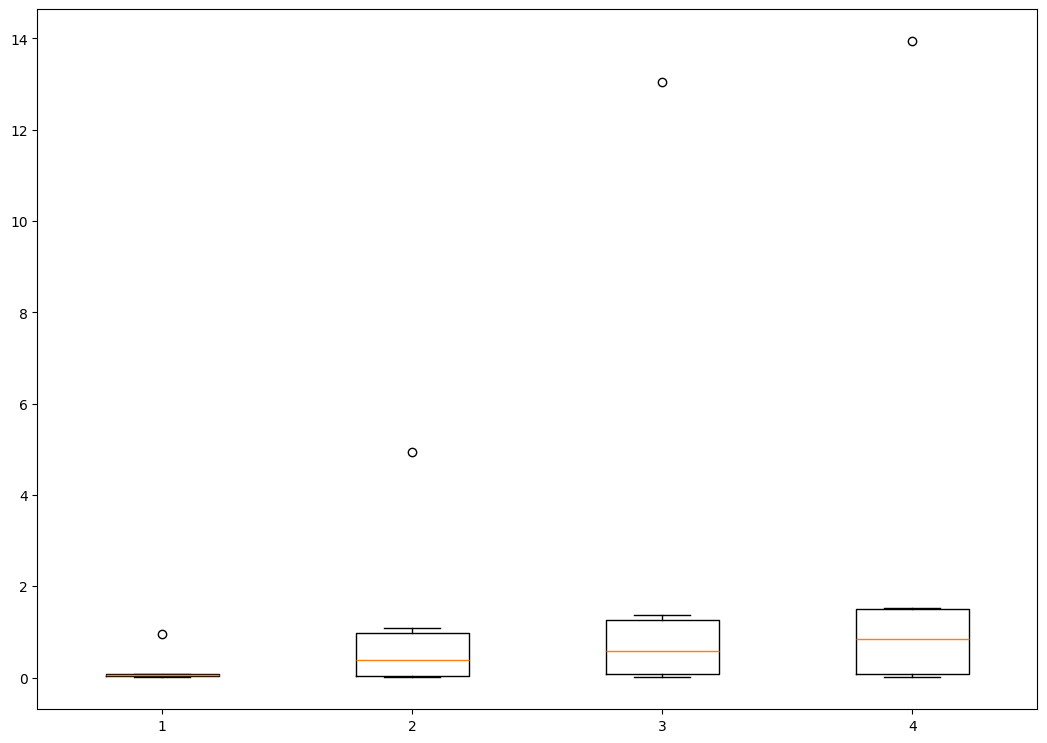

In [23]:
# create box and whisker plot
d_1 = data['dz']
d_2 = data['dx']
d_3 = data['dy']
d_4 = data['dS']
d = [d_1, d_2, d_3, d_4]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(d)

plt.show()